In [54]:
import scipy.linalg as linalg
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import operator
import pandas as pd
import ssaCore

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


In [55]:
def getDif(F, Frest):
    perc = []
    for i in range(len(F)):
        a = F[i]
        b = Frest[i]
        perc.append(abs((a-b) / ((a+b)/2)))
    print("max",max(perc))
    print("min",min(perc))
    print("avr",sum(perc)/len(perc))

In [56]:
N = 300
L = 100 # Длинна гусеницы
K = N - L + 1 # Количество столбцов в траекторной матрице
t = np.arange(0,N)

In [57]:
trend = 0.08 * t
p1, p2 = 11, 8
periodic1 = 0.9 * np.sin(2*np.pi*t/p1)
periodic2 = 0.8 * np.sin(2*np.pi*(t+0.09)/p2)

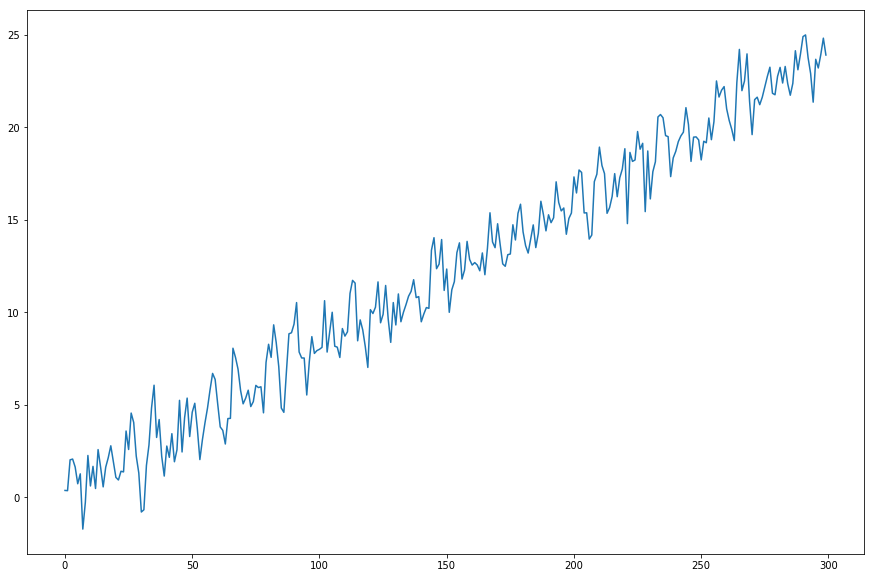

In [58]:
noise = np.random.normal(0, 0.8, N)

F = trend + periodic1 + periodic2 + noise
plt.plot(t, F)

In [31]:
ssa = ssaCore.SSA()
ssa.ssa(F[0:250], L)
ssa.getComponents(0.8)
print(ssa.components)
ssa.filterComponents(0.02)
print(ssa.components)

[2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 21, 19, 23, 23, 24, 26, 27, 32, 33, 38, 39, 57, 58, 61, 62, 72, 74, 73, 74, 79, 80, 92, 95, 93, 94, 96, 97, 98, 99, 0, 1]
[2, 3, 4, 5, 0, 1]


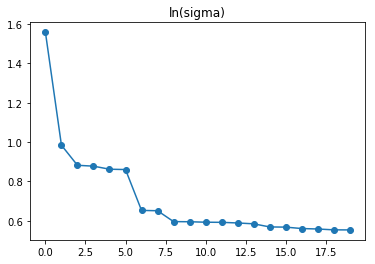

In [32]:
ln = list()
for i in range(20):
    ln.append(np.log(ssa.sigma[i]) / np.log(100))
tss = np.arange(0, len(ln))
plt.title("ln(sigma)")
plt.plot(tss, ln, marker='o')
plt.show()

In [33]:
ssa.restore()

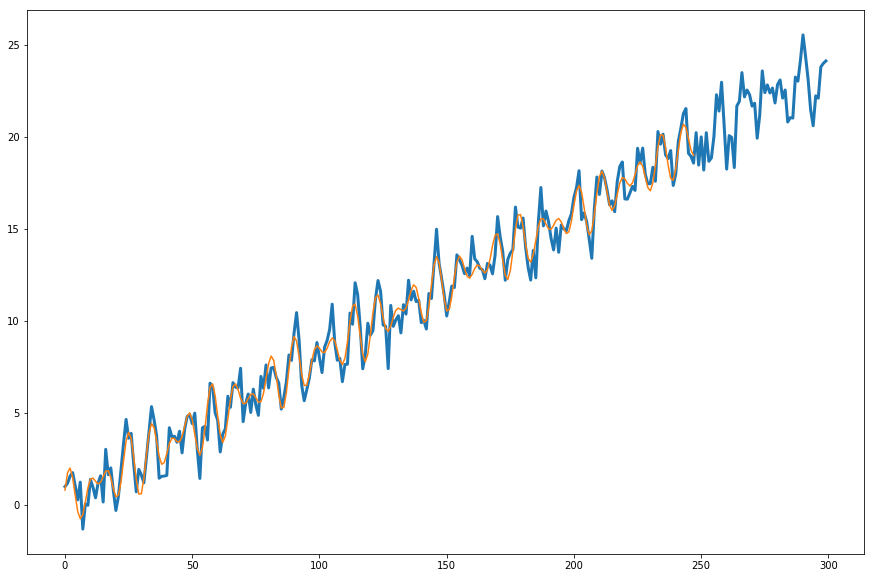

In [53]:
plt.plot(t, F, linewidth = 3)
plt.plot(np.arange(len(ssa.Xf)), ssa.Xf)

In [35]:
ssa.predict(50)

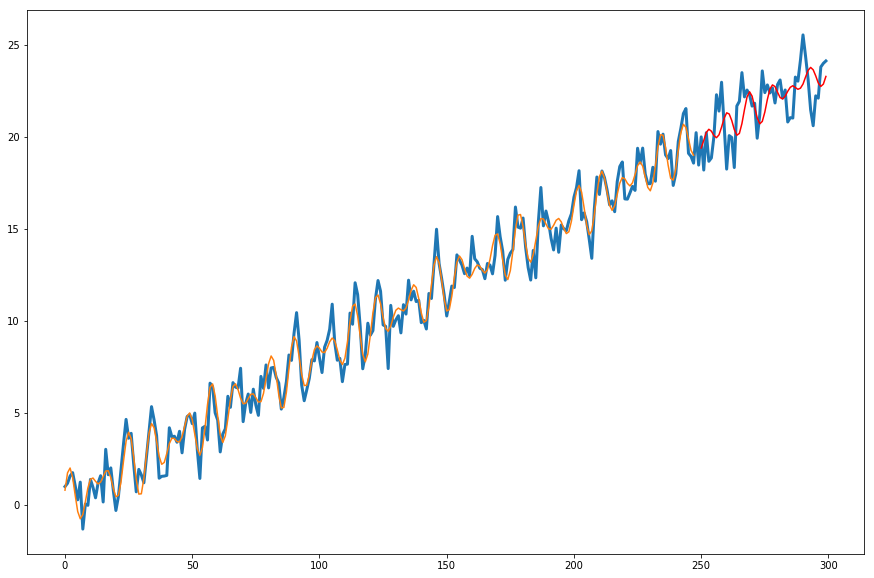

In [52]:
pylab.plot(t, F, linewidth = 3)
pylab.plot(np.arange(len(ssa.Xf)), ssa.Xf)
pylab.plot(np.arange(250, 300), ssa.Xfor, color = "red")

In [42]:
getDif(F[250:300], ssa.Xfor)

max 0.15462290441840384
min 0.0004936116349317607
avr 0.054217761789752815


In [63]:
N = 1000
L = 300 # Длинна гусеницы
K = N - L + 1 # Количество столбцов в траекторной матрице
t = np.arange(0,N)

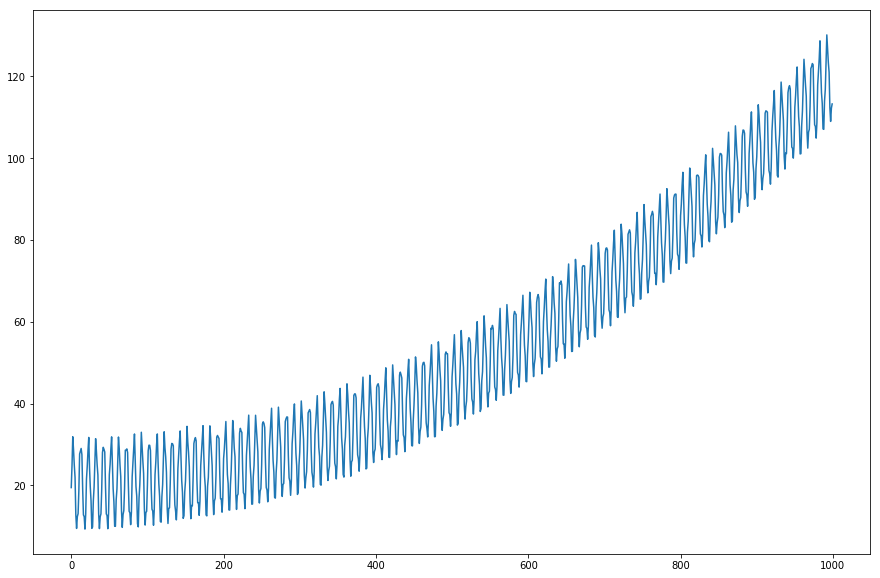

In [64]:
trend = 20 + 0.0001 * (t ** 2)
p1, p2 = 10, 3
periodic1 = 10 * np.sin(2*np.pi*t/p1)
periodic2 = 2 * np.cos(20*np.pi*(t-0.5)/p2)
noise = np.random.normal(0, 0.3, N)

F = trend + periodic1 + periodic2 + noise
plt.plot(t, F)

In [65]:
ssa = ssaCore.SSA()
ssa.ssa(F[0:700], L)
ssa.getComponents(0.8)
print(ssa.components)
ssa.filterComponents(0.02)
print(ssa.components)

[1, 2, 3, 4, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 23, 25, 26, 27, 28, 29, 32, 33, 36, 37, 38, 39, 41, 42, 43, 44, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 66, 68, 71, 73, 77, 78, 81, 82, 85, 86, 87, 88, 87, 90, 98, 99, 100, 101, 104, 105, 106, 109, 111, 112, 117, 118, 122, 123, 127, 128, 129, 130, 133, 134, 140, 141, 142, 143, 147, 148, 156, 157, 162, 164, 163, 167, 165, 168, 174, 179, 175, 176, 177, 178, 181, 182, 190, 191, 202, 203, 205, 206, 207, 208, 218, 219, 227, 228, 229, 230, 234, 235, 236, 237, 239, 240, 267, 269, 273, 274, 278, 280, 279, 281, 283, 287, 289, 290, 291, 292, 294, 295, 296, 297, 298, 299, 0]
[1, 2, 3, 4, 0]


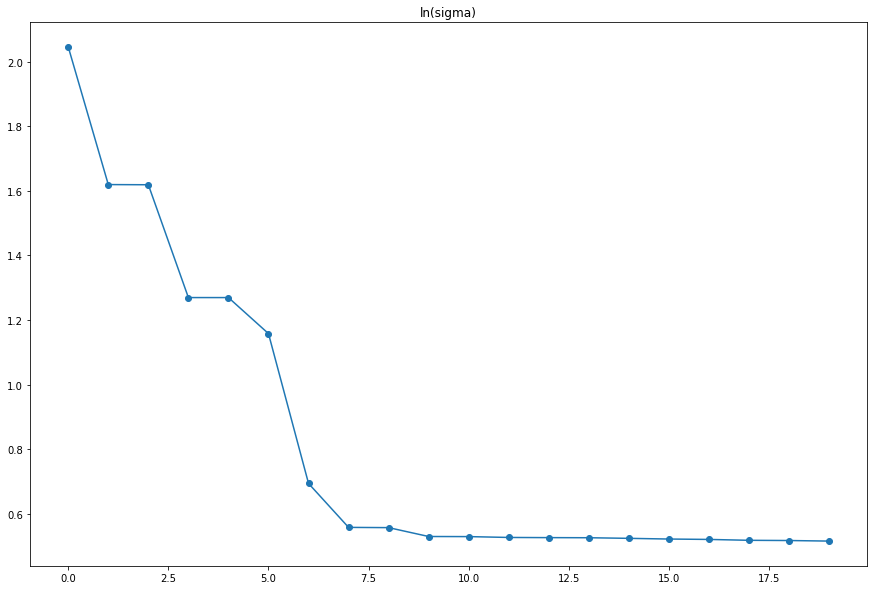

In [66]:
ln = list()
for i in range(20):
    ln.append(np.log(ssa.sigma[i]) / np.log(100))
tss = np.arange(0, len(ln))
plt.title("ln(sigma)")
plt.plot(tss, ln, marker='o')
plt.show()

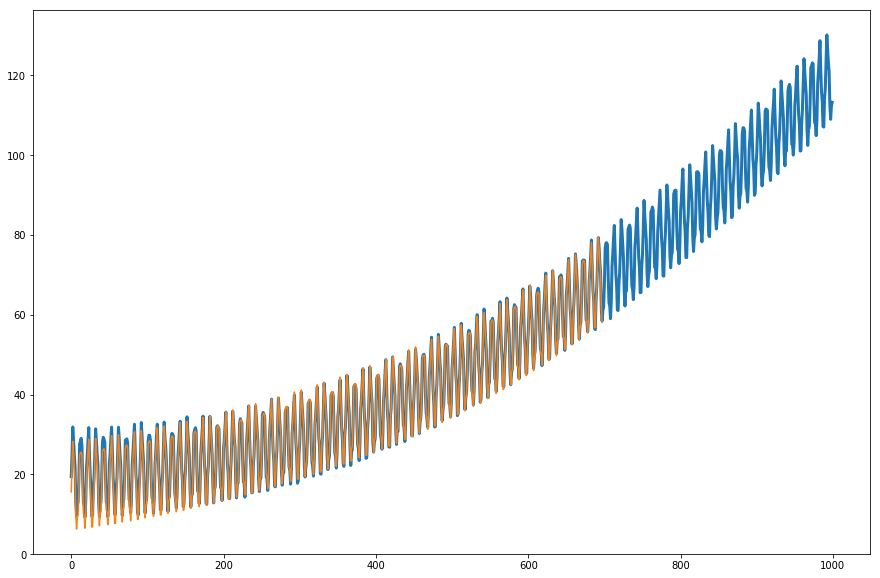

In [67]:
ssa.restore()
plt.plot(t, F, linewidth = 3)
plt.plot(np.arange(len(ssa.Xf)), ssa.Xf)

In [68]:
ssa.predict(300)

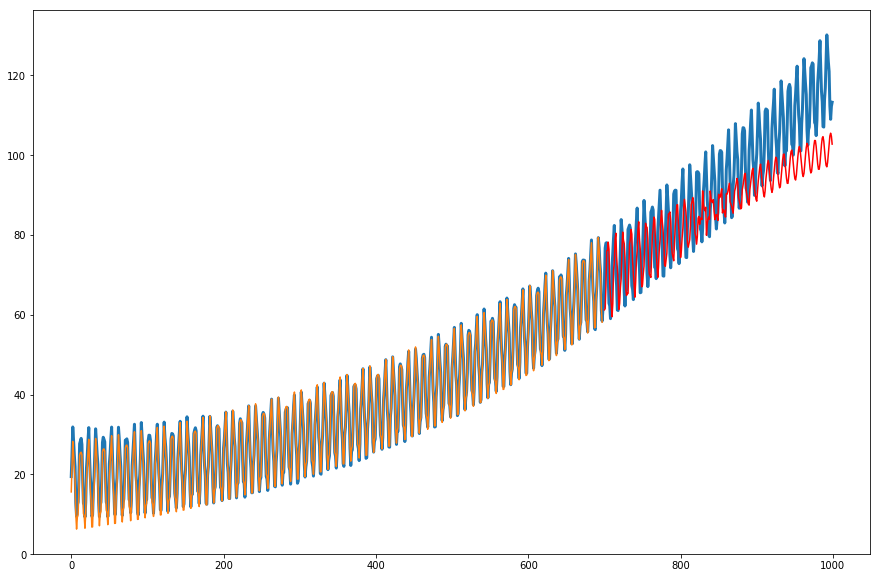

In [70]:
pylab.plot(t, F, linewidth = 3)
pylab.plot(np.arange(len(ssa.Xf)), ssa.Xf)
pylab.plot(np.arange(700, 1000), ssa.Xfor, color = "red")

In [71]:
getDif(F[250:300], ssa.Xfor)

max 1.2454137426428593
min 0.5498928547789942
avr 0.9002514508209093
